<a href="https://colab.research.google.com/github/alexbrun01/Book-Data-Science-do-Zero-/blob/main/Projeto_I_PT_2_Modelo_2_Primeiro_Semestre_2023_Aplica%C3%A7%C3%A3o_de_M%C3%A9todos_de_Aprendizagem_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto I - Modelo 2  - Primeiro Semestre 2023 - Aplicação de Métodos de Aprendizagem de Máquina

Nome do Acadêmico: Alexandre Bruno Dos Santos

Matrícula: 1947015

Nome do Acadêmico: Diogo de Paiva Carneiro

Matrícula: 3289185

Nome do Acadêmico: Suzana Aparecida Alves

Matrícula: 2468442

#Definição do Tema





Atualmente houve um aumento de pessoas interessadas no mercado financeiro, com isso nasceu a necesidade de buscar estudar os padrões de movimentações dos valores de ativos na bolsa, sendo assim, o intuito aqui é poder estudar um ativo e expecifico e poder analisar padrões e prever valores. 

( Metodo: Arvore de Decisões )

#1 Instalando as bibliotecas

In [23]:
#Importando bibliotecas 

!pip install pandas yfinance scikit-learn matplotlib

import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2 Definindo o Papel que desejamos consultar

In [24]:
# Definindo o codigo da ação
ticker = 'BBDC4.SA'

#3 Escolhendo os periodos que vamos querer usar como parametro

In [25]:
# Definindo período dos dados
start_date = '2015-01-01'
end_date = '2023-07-30'


#4 Baixando os dados das ações

In [26]:
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


# 5 Preparando os Data Frames

In [27]:
# Visualizando os dados de abertura e fechamento

print(data[['Open', 'Close']])

                 Open      Close
Date                            
2015-01-02  13.621853  13.445455
2015-01-05  13.214177  13.465055
2015-01-06  13.488574  13.908010
2015-01-07  14.088328  14.460724
2015-01-08  14.503844  14.535203
...               ...        ...
2023-06-05  16.200001  16.330000
2023-06-06  16.400000  16.590000
2023-06-07  16.740000  16.580000
2023-06-09  16.670000  16.860001
2023-06-12  16.950001  16.700001

[2098 rows x 2 columns]


In [28]:
# Criando um DataFrame com os preços de fechamento

df = pd.DataFrame(data["Close"])

In [29]:
# Removendo valores ausentes

df.dropna(inplace=True)  

#6 Criando uma coluna com os preços medios de fechamento das ações

In [30]:
df["Avg Close"] = df["Close"].rolling(window=21).mean()

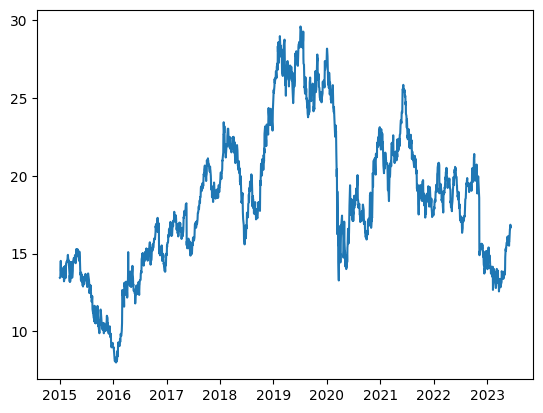

In [31]:
# Plot dos preços de fechamento
plt.plot(df['Close'], label='Preço de Fechamento')

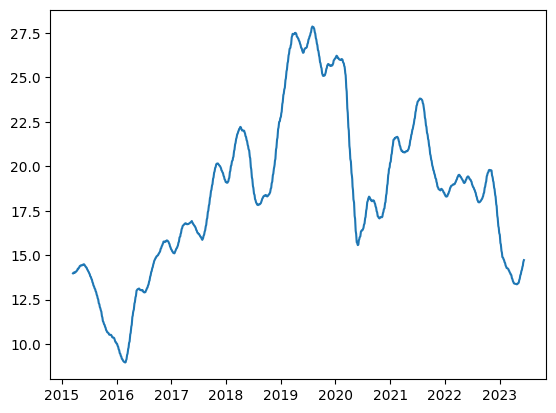

In [32]:
# Plot da média móvel de curto prazo (exemplo: 50 períodos)
df['SMA_short'] = df['Close'].rolling(window=50).mean()
plt.plot(df['SMA_short'], label='Média Móvel Curto Prazo (50 períodos)')

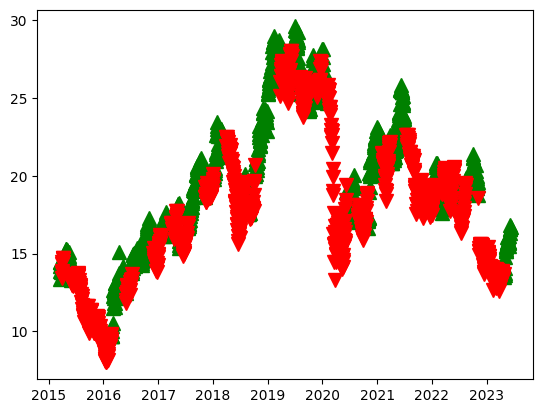

In [33]:
## Esse trecho de código calcula as médias móveis curtas!

# As média movéis é uma técnica que suaviza os dados de preço ao longo do tempo,fornecendo uma tendência geral dos dados

# Cálculo das médias móveis curtas e longas
df['SMA_short'] = df['Close'].rolling(window=21).mean()
df['SMA_long'] = df['Close'].rolling(window=50).mean()


# Plot dos pontos de entrada e saída
df['Signal'] = 0  # Inicializa a coluna Signal com valor zero porque é inicializada com o valor zero para todos os registros do DataFrame.

df.loc[df['SMA_short'] > df['SMA_long'], 'Signal'] = 1  # Definição dos pontos de entrada. Agora com os valores 1 nos pontos em que a média móvel curta é maior que a média móvel longa indicando um ponto de entrada. 

df.loc[df['SMA_short'] < df['SMA_long'], 'Signal'] = -1  # Definição dos pontos de saída.  Da mesma forma, a coluna 'Signal' é atualizada com os valores -1 nos pontos em que a média móvel curta é menor que a média móvel longa, indicando um ponto de saída.

# Plot dos pontos de entrada e saída
plt.plot(df[df['Signal'] == 1].index, df[df['Signal'] == 1]['Close'], '^', markersize=10, color='g', label='Ponto de Entrada')
plt.plot(df[df['Signal'] == -1].index, df[df['Signal'] == -1]['Close'], 'v', markersize=10, color='r', label='Ponto de Saída')

Esse trecho de código calcula as médias móveis curtas, As média movéis é uma técnica que suaviza os dados de preço ao longo do tempo, fornecendo uma tendência geral dos dados 

#7 Separando os dados em treinamento e teste

In [34]:
X = df[["Avg Close"]] # Aqui definimos a variável X como uma coluna do DataFrame contendo os valores da média de fechamento

y = df["Close"] # Aqui definimos a variável y como a coluna do DataFrame df contendo os valores de fechamento do ativo.
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A função " train_test_split "  é utilizada para dividir os dados em conjuntos de treinamento e teste. A função recebe as variáveis X e y, além de outros parâmetros.

# O parâmetro test_size=0.2 indica que 20% dos dados serão usados para teste, enquanto 80% dos dados serão usados para treinamento.

# O parâmetro random_state=42 é usado para fixar a aleatoriedade na divisão dos dados. Isso garante que a divisão seja reproduzível, ou seja, ao executar o código novamente, a mesma divisão será obtida.

#8 Treinando o modelo Arvore de decisões 

In [35]:
 # Remove as amostras com valores ausentes do DataFrame
 df.dropna(inplace=True) 

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # Cria um objeto SimpleImputer para preencher os valores ausentes com a média. Ele permite preencher os valores ausentes usando diferentes estratégias

X_train_imputed = imputer.fit_transform(X_train) # fit_transform é aplicado ao conjuntos X_train para preencher os valores ausentes com base na estratégia 

In [37]:
# Treina o modelo com os dados imputados
model = DecisionTreeRegressor()
model.fit(X_train_imputed, y_train)

DecisionTreeRegressor()

# 9 Teste com Previsão do modelo treinado

In [38]:
X = X.dropna()
y = y[X.index]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)



In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 10 Plotando o grafico

In [40]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go

# Definir o ticker do ativo
ticker = "AAPL"

# Obter dados históricos do Yahoo Finance
data = yf.download(ticker, start="2022-01-01", end="2023-12-31")

# Criar DataFrame com os preços de fechamento
df = pd.DataFrame(data["Close"])

# Definir variável alvo (y) como os preços de fechamento
y = df["Close"]

# Definir variáveis de entrada (X) como os dias anteriores de preços de fechamento
X = pd.concat([y.shift(1), y.shift(2), y.shift(3), y.shift(4)], axis=1)
X.columns = ["Lag1", "Lag2", "Lag3", "Lag4"]

# Remover as linhas com valores ausentes
X = X.dropna()
y = y[X.index]

# Preencher valores ausentes
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão de árvore de decisão
model = DecisionTreeRegressor()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões para o conjunto de treinamento e teste
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Definindo a data de início e fim do intervalo desejado
data_inicio = '2023-04-22'
data_fim = '2023-07-30'

# Criando o intervalo de datas com a frequência desejada
datas = pd.date_range(start=data_inicio, end=data_fim, freq='D')

# Criando um gráfico de linhas interativo
fig = go.Figure()

# Adicionando a linha de previsões para valores futuros
fig.add_trace(go.Scatter(
    x=datas,
    y=y_pred_test,
    mode='lines',
    name='Previsões'
))

# Definindo o layout do gráfico
fig.update_layout(
    title='Previsões do Modelo para Valores Futuros',
    xaxis_title='Data',
    yaxis_title='Valor'
)

# Exibindo o gráfico interativo
fig.show()


[*********************100%***********************]  1 of 1 completed


In [41]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# 1. Obtendo os dados originais
ticker_symbol = 'BBDC4.SA'  # Substitua pelo símbolo do ticker desejado
start_date = '2023-04-22'
end_date = '2023-07-30'

# Obtendo os dados do Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# 2. Formatando os dados originais
data = data[['Close']]  # Selecionando apenas a coluna "Close" (preço de fechamento)
data.columns = ['Valor']  # Renomeando a coluna para "Valor"

# 3. Filtrando os dados
filtered_data = data[start_date:end_date]

# 4. Criando o gráfico de comparação
fig = go.Figure()

# Adicionando a linha dos valores passados
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Valor'],
    mode='lines',
    name='Valores Passados'
))

# Adicionando a linha dos valores atuais no intervalo de tempo desejado
fig.add_trace(go.Scatter(
    x=filtered_data.index,
    y=filtered_data['Valor'],
    mode='lines',
    name='Valores Atuais'
))

# Adicionando a linha das previsões para valores futuros no intervalo de tempo desejado
# Insira aqui o código para obter as previsões para valores futuros, se aplicável.

# Definindo o layout do gráfico
fig.update_layout(
    title='Comparação entre Valores Passados, Valores Atuais e Previsões Futuras',
    xaxis_title='Data',
    yaxis_title='Valor'
)

# Exibindo o gráfico interativo
fig.show()


[*********************100%***********************]  1 of 1 completed


#11 Carregando os dados de teste atualizados

In [44]:
import pandas as pd

# Obter a data do próximo dia útil usando a biblioteca pandas
proximo_dia_util = pd.Timestamp.now().normalize() + pd.offsets.BDay(1)

# Criar o DataFrame com os dados do próximo dia útil
df_pred = pd.DataFrame({'data': [proximo_dia_util], 'abertura': [0], 'alta': [0], 'baixa': [0], 'fechamento': [0], 'volume': [0]})




#12 Tratar valores ausentes e/ou inconsistentes
Essa é uma etapa importante do pré-processamento dos dados para garantir que o modelo seja treinado com dados confiáveis e precisos.

In [45]:
# Preenchimento com média
data.fillna(data.mean(), inplace=True)


<ipython-input-45-fc8838cd1c89>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
# Verificando a contagem de valores ausentes antes do preenchimento
print(data.isnull().sum())

# Preenchimento com média
data.fillna(data.mean(), inplace=True)

# Verificando a contagem de valores ausentes depois do preenchimento
print(data.isnull().sum())


Valor    0
dtype: int64
Valor    0
dtype: int64


<ipython-input-46-1dbd1d190bbd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
# Verificando a contagem de valores ausentes antes do preenchimento
print(data.isnull().sum())

# Preenchimento com média
data.fillna(data.mean(), inplace=True)

# Verificando a contagem de valores ausentes depois do preenchimento
print(data.isnull().sum())

# Verificando a contagem de valores ausentes antes do preenchimento
print(data.isnull().sum())

# Preenchimento com média
data.fillna(data.mean(), inplace=True)

# Verificando a contagem de valores ausentes depois do preenchimento
print(data.isnull().sum())


Valor    0
dtype: int64
Valor    0
dtype: int64
Valor    0
dtype: int64
Valor    0
dtype: int64


<ipython-input-47-092cc97d3fc8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-092cc97d3fc8>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 13 Normalização dos dados

In [48]:
# Verificar valores ausentes antes do preenchimento
print("Valores ausentes antes do preenchimento:", data['Valor'].isnull().sum())

# Preenchimento com média usando a coluna 'Valor'
data['Valor'].fillna(data['Valor'].mean(), inplace=True)

# Verificar valores ausentes após o preenchimento
print("Valores ausentes após o preenchimento:", data['Valor'].isnull().sum())


Valores ausentes antes do preenchimento: 0
Valores ausentes após o preenchimento: 0


<ipython-input-48-9add5d5dd590>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
# Verificar valores ausentes antes do preenchimento
print("Valores ausentes antes do preenchimento:", data['Valor'].isnull().sum())

# Preenchimento com média usando a coluna 'Valor'
data.loc[:, 'Valor'] = data['Valor'].fillna(data['Valor'].mean())

# Verificar valores ausentes após o preenchimento
print("Valores ausentes após o preenchimento:", data['Valor'].isnull().sum())


Valores ausentes antes do preenchimento: 0
Valores ausentes após o preenchimento: 0


<ipython-input-49-b03e48889b20>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
import yfinance as yf
import pandas as pd

# Definir o símbolo do ticker
ticker_symbol = 'BBDC4.SA'  
# Obter os dados históricos do Yahoo Finance
data = yf.download(ticker_symbol, start='2022-01-01', end='2022-12-31')

# Verificar valores ausentes antes do preenchimento
print("Valores ausentes antes do preenchimento:")
print(data[['Low', 'Close', 'Adj Close', 'Volume']].isnull().sum())

# Preenchimento com média usando as colunas 'Low', 'Close', 'Adj Close' e 'Volume'
data[['Low', 'Close', 'Adj Close', 'Volume']] = data[['Low', 'Close', 'Adj Close', 'Volume']].fillna(data.mean())

# Verificar valores ausentes após o preenchimento
print("Valores ausentes após o preenchimento:")
print(data[['Low', 'Close', 'Adj Close', 'Volume']].isnull().sum())


[*********************100%***********************]  1 of 1 completed
Valores ausentes antes do preenchimento:
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Valores ausentes após o preenchimento:
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# 14 Criação de novas variaveis

A criação de novas variáveis pode ajudar a melhorar o desempenho do modelo, fornecendo informações adicionais que podem ser relevantes para a previsão. Veja um exemplo de código para criar novas variáveis com base em médias móveis e diferenças de preços.

Iremos criar novas variáveis com base em médias móveis (SMA) e diferenças de preços

In [51]:
import pandas as pd

# Definir janela da média móvel
window = 5

# Criar a média móvel simples (SMA) da coluna 'Close'
data['SMA'] = data['Close'].rolling(window=window).mean()

# Criar a diferença de preços entre o dia atual e o dia anterior
data['PriceDiff'] = data['Close'].diff()

# Criar uma variável binária indicando se houve aumento ou diminuição de preço em relação ao dia anterior
data['PriceChange'] = data['PriceDiff'].apply(lambda x: 1 if x > 0 else 0)

# Visualizar as primeiras linhas do DataFrame com as novas variáveis criadas
print(data.head())


                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2022-01-03  17.645454  18.109091  17.590908  17.900000  16.674225   35620970   
2022-01-04  17.890909  18.109091  17.790909  18.000000  16.783552  110060060   
2022-01-05  17.954544  18.109091  17.700001  17.872726  16.664877   45808070   
2022-01-06  17.809090  18.172728  17.772726  18.127272  16.902225   36651120   
2022-01-07  18.154545  18.390909  17.745455  18.390909  17.148043   84778540   

                  SMA  PriceDiff  PriceChange  
Date                                           
2022-01-03        NaN        NaN            0  
2022-01-04        NaN   0.100000            1  
2022-01-05        NaN  -0.127274            0  
2022-01-06        NaN   0.254545            1  
2022-01-07  18.058181   0.263638            1  


# 15 Treinar Modelos

Logo abaixo usaremos um código que realizará a busca em grade para selecionar os melhores parâmetros para um modelo de regressão linear.

Utilizamos o StandardScaler para normalizar os dados de entrada, e em seguida realizamos a busca em grade com validação cruzada para selecionar os melhores parâmetros para o modelo de regressão linear. Depois, ajustamos o modelo aos dados de treinamento com os melhores parâmetros e avaliamos seu desempenho nos dados de teste.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

target_variable = 'Adj Close'

# Separar os dados de entrada (X) e a variável alvo (y)
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um pipeline com o scaler, imputer e o modelo de regressão linear
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Definir os parâmetros para busca em grade
params = {
    'regression__fit_intercept': [True, False]
}

# Realizar a busca em grade com validação cruzada
grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros encontrados
best_params = grid_search.best_params_

# Atualizar o pipeline com os melhores parâmetros
pipeline.set_params(**best_params)

# Treinar o modelo com os dados de treinamento
pipeline.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = pipeline.predict(X_test)

# Calcular o erro médio quadrado (MSE) nas previsões
mse = mean_squared_error(y_test, y_pred)

# Imprimir os melhores parâmetros e o MSE
print("Melhores parâmetros encontrados:", best_params)
print("Erro médio quadrado (MSE):", mse)


Melhores parâmetros encontrados: {'regression__fit_intercept': True}
Erro médio quadrado (MSE): 0.020924095554628416
